# Lab Work: Developing and Comparing AI Models for Android Malware Detection

## Objective:
The goal of this lab is to develop and evaluate multiple AI models for detecting Android malware using the provided Android Malware Dataset. Students will choose at least three different machine learning or deep learning algorithms to compare their performance in classifying Android applications as benign or malicious.

## Dataset Overview:
The **Android Malware Dataset for Machine Learning** contains labeled Android APK samples, classified as benign (goodware) or malicious (e.g., adware, spyware, trojans). It includes various features extracted from the APKs, such as requested permissions, API calls, system behaviors, and more, which can be used to train machine learning models.

## Tasks:

1. **Data Preprocessing**:
   - Load the dataset and clean it by handling missing values and converting categorical features into numerical ones if necessary.
   - Split the data into training and testing sets.

2. **Model Development**:
   - Choose at least **three AI algorithms** of your choice (e.g., Logistic Regression, Random Forest, SVM, Neural Networks, XGBoost, etc.).
   - Train each model on the dataset and evaluate their performance using accuracy, precision, recall, F1-score, and confusion matrix.

3. **Model Comparison**:
   - Compare the models based on their performance metrics.
   - Analyze which model performs best and why.

4. **Optional (Hyperparameter Tuning)**:
   - Optionally, apply techniques like grid search to optimize the model’s hyperparameters.


## Resources:
- Kaggle Dataset: [Android Malware Dataset for Machine Learning](https://www.kaggle.com/datasets/shashwatwork/android-malware-dataset-for-machine-learning)

You need to login in Kaggle to get access to the dataset.


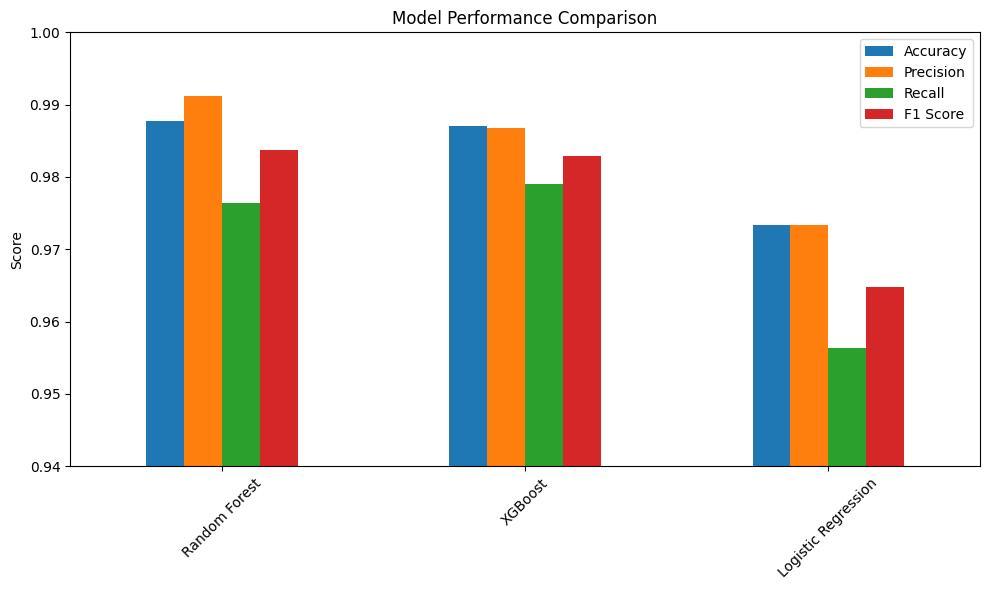

In [4]:
import pandas as pd
import warnings
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Suppress warnings
warnings.filterwarnings("ignore")

# Load data
df = pd.read_csv("Data.csv")

# Encode target
df['class'] = LabelEncoder().fit_transform(df['class'])

# Drop non-numeric columns
df = df.select_dtypes(include=['int64', 'float64'])

# Fill missing values
df = pd.DataFrame(SimpleImputer(strategy='median').fit_transform(df), columns=df.columns)

# Features and target
X = df.drop(columns='class')
y = df['class']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Models
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Random Forest": RandomForestClassifier(n_estimators=100),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss')
}

# Train & evaluate
performance = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    performance[name] = {
        "Accuracy": accuracy_score(y_test, preds),
        "Precision": precision_score(y_test, preds),
        "Recall": recall_score(y_test, preds),
        "F1 Score": f1_score(y_test, preds)
    }

# Create DataFrame & sort
metrics_df = pd.DataFrame(performance).T
metrics_df_sorted = metrics_df.sort_values(by="F1 Score", ascending=False)

# Plot
metrics_df_sorted.plot(kind='bar', figsize=(10, 6))
plt.title("Model Performance Comparison")
plt.ylabel("Score")
plt.ylim(0.94, 1.0)  # Zoom in
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig("model_performance_logbook_plot.png")
plt.show()
